### Tema 1. Clustering jerárquico y no jerárquico

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df_iris = pd.read_csv('iris.csv')

In [ ]:
sns.set_style('whitegrid')
sns.set_palette('husl')

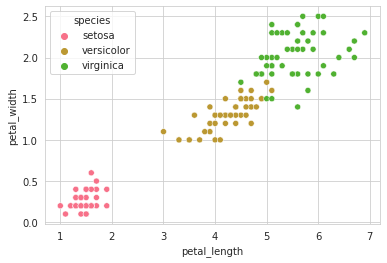

In [ ]:
sns.scatterplot(data=df_iris,
                x='petal_length',
                y='petal_width',
                hue='species')

In [ ]:
from scipy.cluster import hierarchy

In [ ]:
df_iris_subset = df_iris.sample(20)

In [ ]:
df_iris_subset

,sepal_length,sepal_width,petal_length,petal_width,species
58,6.6,2.9,4.6,1.3,versicolor
43,5.0,3.5,1.6,0.6,setosa
8,4.4,2.9,1.4,0.2,setosa
37,4.9,3.1,1.5,0.1,setosa
94,5.6,2.7,4.2,1.3,versicolor
19,5.1,3.8,1.5,0.3,setosa
125,7.2,3.2,6.0,1.8,virginica
82,5.8,2.7,3.9,1.2,versicolor
51,6.4,3.2,4.5,1.5,versicolor
78,6.0,2.9,4.5,1.5,versicolor


In [ ]:
Z = hierarchy.linkage(df_iris_subset.drop('species', axis=1 ), 'ward')

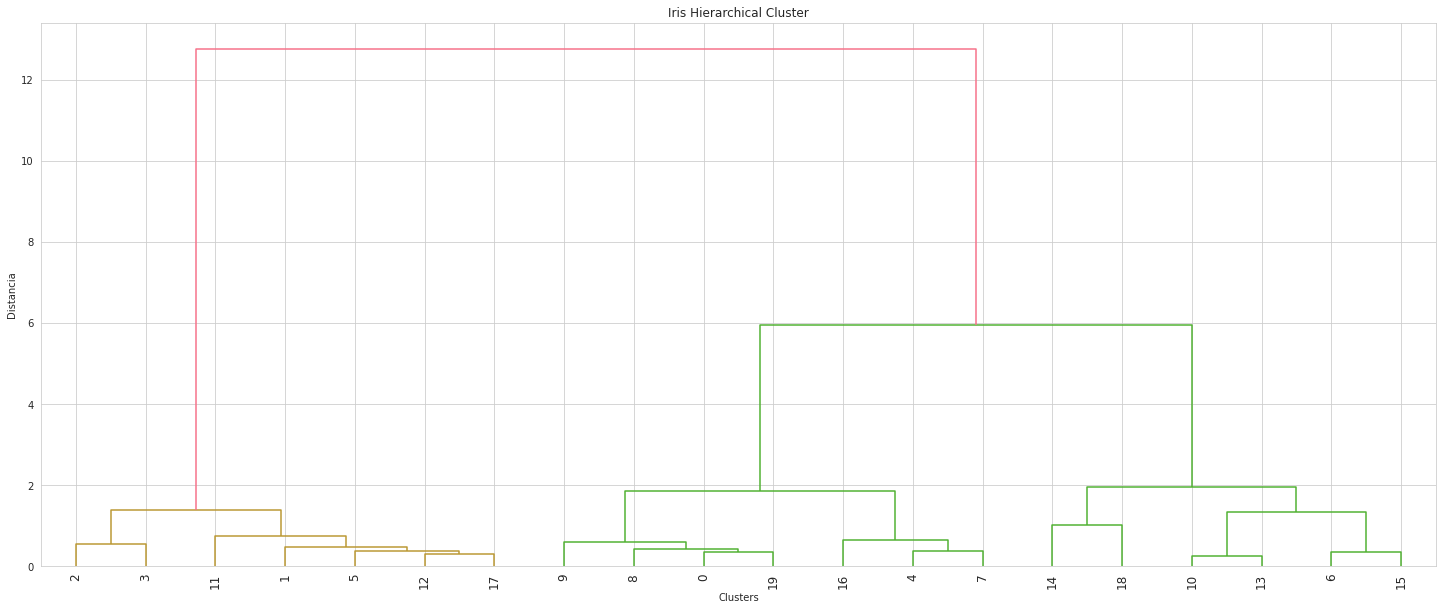

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
plt.title('Iris Hierarchical Cluster')
plt.xlabel('Clusters')
plt.ylabel('Distancia')
hierarchy.dendrogram(Z,leaf_rotation=90)
plt.show()

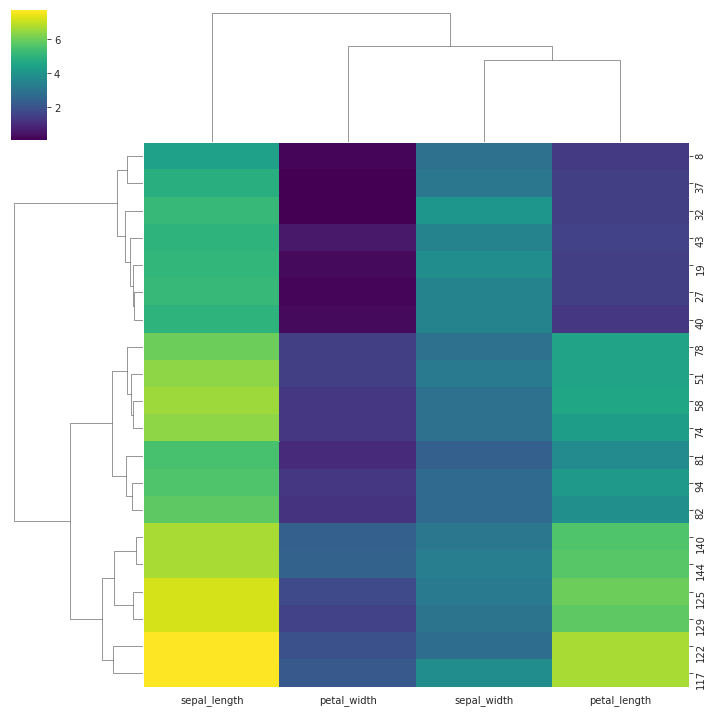

In [ ]:
sns.clustermap(df_iris_subset.drop('species', axis=1 ), cmap='viridis')

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
x = df_iris_subset.drop('species', axis=1 )

In [ ]:
x

,sepal_length,sepal_width,petal_length,petal_width
58,6.6,2.9,4.6,1.3
43,5.0,3.5,1.6,0.6
8,4.4,2.9,1.4,0.2
37,4.9,3.1,1.5,0.1
94,5.6,2.7,4.2,1.3
19,5.1,3.8,1.5,0.3
125,7.2,3.2,6.0,1.8
82,5.8,2.7,3.9,1.2
51,6.4,3.2,4.5,1.5
78,6.0,2.9,4.5,1.5


In [ ]:
hcluster = AgglomerativeClustering(n_clusters=2,
                                   affinity='euclidean',
                                   linkage='ward') 

hcluster.fit_predict(x[['petal_length','petal_width']])

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0])

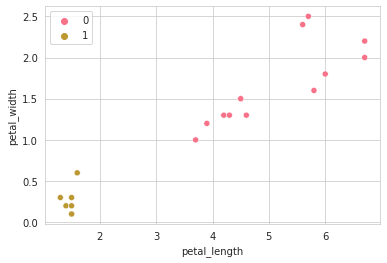

In [ ]:
sns.scatterplot(data=x,
                x='petal_length',
                y='petal_width',
                hue=hcluster.fit_predict(x[['petal_length','petal_width']]))

### K-means (Clustering no jerarquico) 

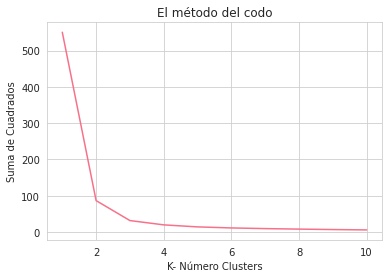

In [ ]:
from sklearn.cluster import KMeans

squared_sum = []
data = df_iris.drop('species', axis=1 )
data = data[['petal_length','petal_width']]
for k in range(1,11):
  kmeans_test = KMeans(n_clusters= k) 
  kmeans_test.fit(data)
  squared_sum.append(kmeans_test.inertia_)

plt.plot(range(1,11),squared_sum)
plt.title('El método del codo')
plt.xlabel('K- Número Clusters')
plt.ylabel('Suma de Cuadrados')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans_labels = kmeans.fit_predict(data)
print(kmeans_labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0]


Importante destecar la convención de variables para distinguir variables entre clases.

Por ejemplo: La variable kmeans es diferente a la clase KMeans. Lo distinguimos por la convención de nombres. 

De la guía de estilo PEP

Function and Variable Names

> Function names should be lowercase, with words separated by underscores as necessary to improve readability.

> Variable names follow the same convention as function names 






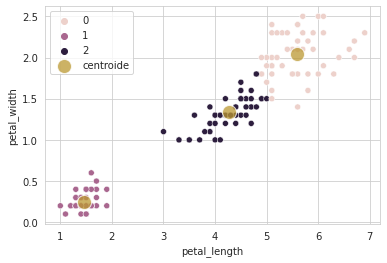

In [ ]:
sns.scatterplot(data=df_iris,
                x='petal_length',
                y='petal_width',
                hue=kmeans_labels)
sns.scatterplot(x=kmeans.cluster_centers_[:,0],
                y=kmeans.cluster_centers_[:,1],
                s=200,
                label='centroide',
                alpha=0.75)

In [ ]:
# Cluster_centers_ es un ATRIBUTO de tipo array que muestra las cordenadas de los centroides
kmeans.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.464     , 0.244     ],
       [4.26923077, 1.34230769]])

In [ ]:
'''
Qué es " : " ? 
Básicamente se utiliza en la matriz para el corte, 
entender corchete aceptar variable que significa valor o clave para mostrar, 
y " : " se utiliza para limitar o cortar toda la matriz en los paquetes
''' 
kmeans.cluster_centers_[:,0]

array([5.59583333, 1.464     , 4.26923077])

In [ ]:
df_iris_kmeans = data.copy()
df_iris_kmeans['kmean_label'] = kmeans_labels
print(df_iris_kmeans)

     petal_length  petal_width  kmean_label
0             1.4          0.2            1
1             1.4          0.2            1
2             1.3          0.2            1
3             1.5          0.2            1
4             1.4          0.2            1
..            ...          ...          ...
145           5.2          2.3            0
146           5.0          1.9            0
147           5.2          2.0            0
148           5.4          2.3            0
149           5.1          1.8            0

[150 rows x 3 columns]


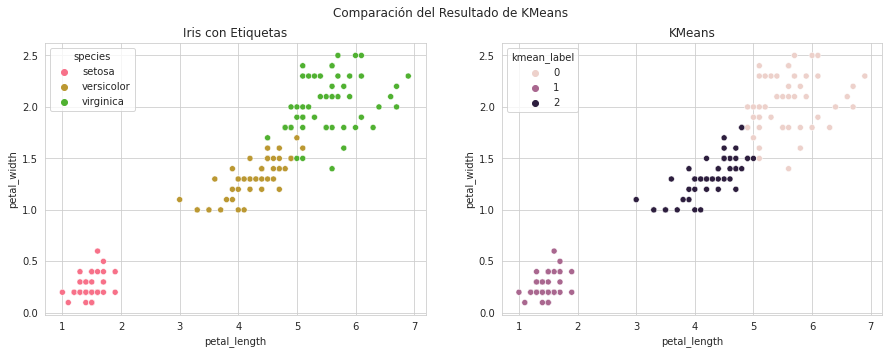

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))
fig.suptitle('Comparación del Resultado de KMeans')
axes[0].set_title('Iris con Etiquetas')
axes[1].set_title('KMeans')
#Primera Gráfica
sns.scatterplot(ax=axes[0],
                data=df_iris,
                x='petal_length',
                y='petal_width',
                hue='species')

# Segunda Gráfica
sns.scatterplot(ax=axes[1],
                data=df_iris_kmeans,
                x='petal_length',
                y='petal_width',
                hue='kmean_label')


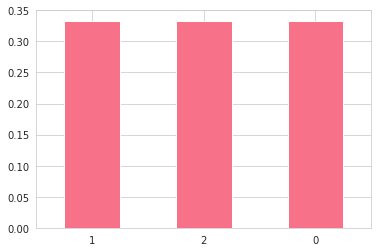

In [ ]:
labels_dict = {
    'setosa' : '1',
    'versicolor' : '2',
    'virginica' : '0'
}

iris_summary = df_iris['species'].replace(labels_dict)
iris_summary.value_counts(normalize=True).plot(kind='bar', rot=360)

In [ ]:
df_iris_kmeans['kmean_label'].value_counts(normalize=True)

2    0.346667
1    0.333333
0    0.320000
Name: kmean_label, dtype: float64

In [ ]:
hcluster = AgglomerativeClustering(n_clusters=3,
                                   affinity='euclidean',
                                   linkage='ward') 

df_iris_hcluster = data.copy()
df_iris_hcluster['hcluster_label'] = hcluster.fit_predict(data)
df_iris_hcluster['hcluster_label'].value_counts(normalize=True)

0    0.360000
1    0.333333
2    0.306667
Name: hcluster_label, dtype: float64

ARI 
El Índice de Rand calcula una medida de similitud entre dos clústeres considerando todos los pares de muestras y contando los pares que se asignan en los mismos o diferentes clústeres en los clústeres predichos y verdaderos.

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
print('RAND Score - Hierarchical Cluster')
print(adjusted_rand_score(labels_true = df_iris['species'].replace(labels_dict),
                    labels_pred = df_iris_hcluster['hcluster_label']))
print('\n')

print('RAND Score - KMeans Cluster')
adjusted_rand_score(labels_true = df_iris['species'].replace(labels_dict),
                    labels_pred = df_iris_kmeans['kmean_label'])

RAND Score - Hierarchical Cluster
0.8857921001989628


RAND Score - KMeans Cluster


0.8856970310281228

In [ ]:
X = data.copy()
X.iloc[:,1]

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal_width, Length: 150, dtype: float64

Puntuación de similitud entre -1,0 y 1,0. Los etiquetados aleatorios tienen un ARI cercano a 0,0. 1,0 significa una coincidencia perfecta.

### Análisis de Siluetas


El análisis de siluetas puede utilizarse para estudiar la distancia de separación entre los clusters resultantes. El gráfico de silueta muestra una medida de la proximidad de cada punto de un clúster a los puntos de los clústeres vecinos y, por tanto, proporciona una forma de evaluar visualmente parámetros como el número de clústeres. Esta medida tiene un rango de [-1, 1].

Para n_clusters =2 el  silhouette_score es :0.7651755502866581
Para n_clusters =3 el  silhouette_score es :0.6602760882193361
Para n_clusters =4 el  silhouette_score es :0.6109733784633249
Para n_clusters =5 el  silhouette_score es :0.5881403468025436
Para n_clusters =6 el  silhouette_score es :0.5767216955814605


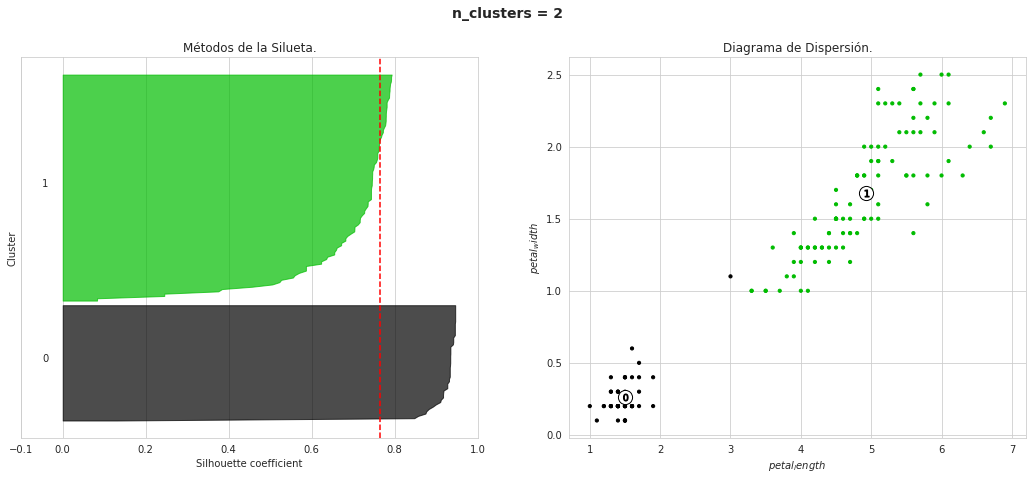

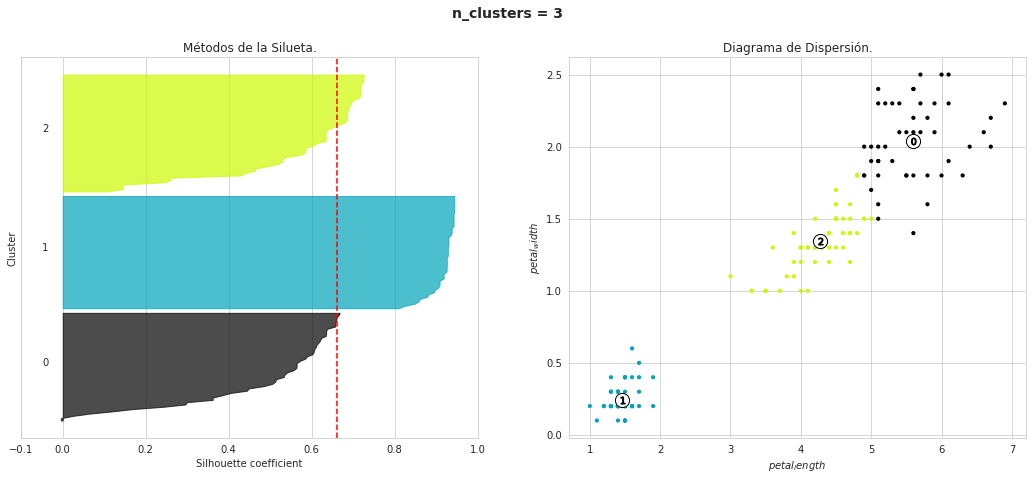

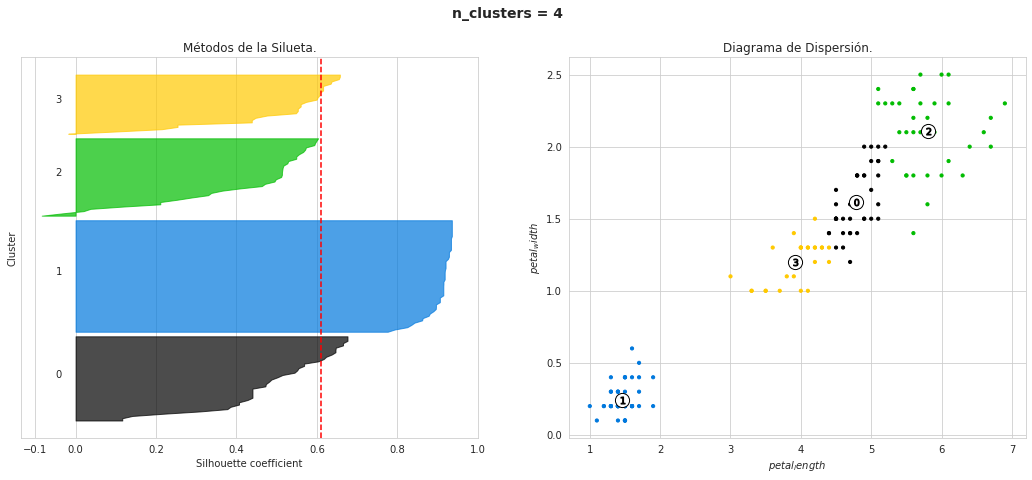

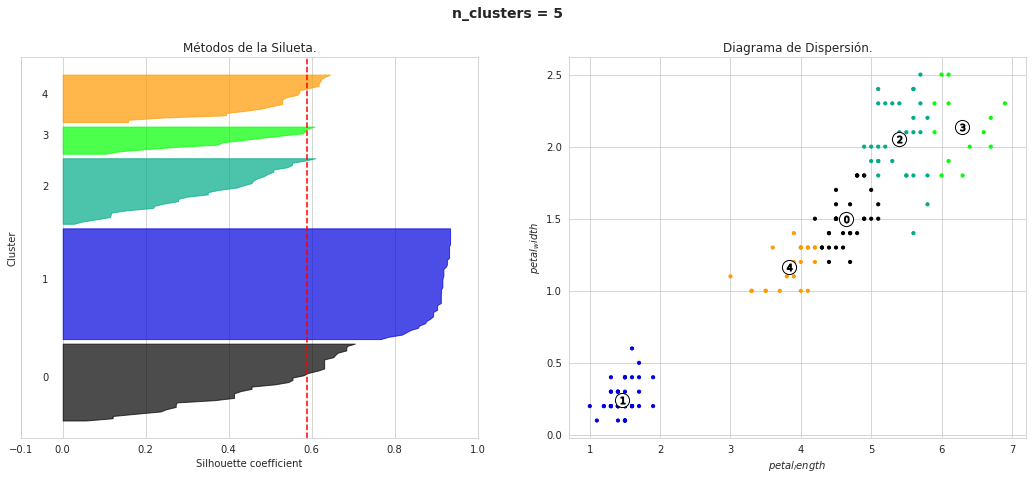

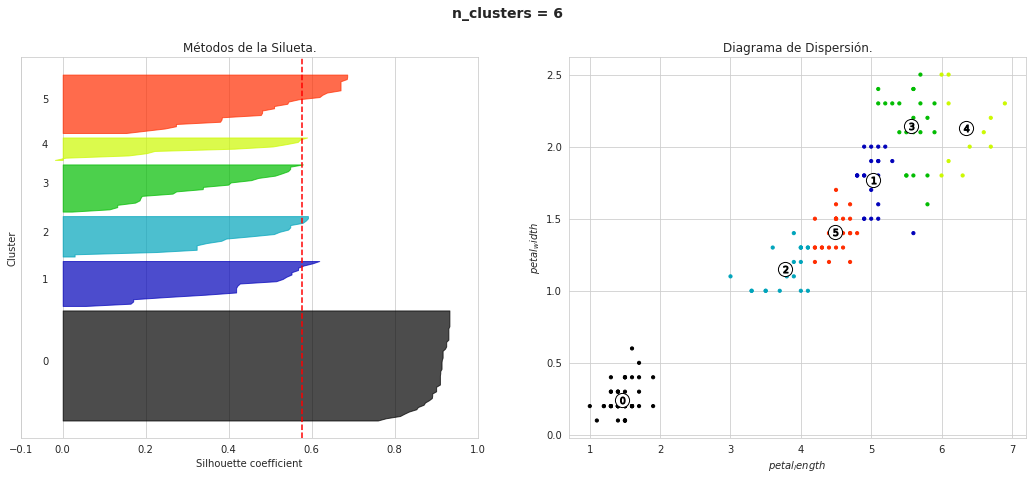

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


X = data.copy()

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    '''
     Se crea una variable fig que implementar todos los  elementos de ls gráficas. Así si mismo plt.subplot nos regresa un arreglo con las gráficas u objetos llamados
     axes
    '''  
    fig, axes = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    kmeans_clusters = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans_clusters.fit_predict(X)

    ### Esta función regresa el promedio del score de todas las muestras.
    silhouette_avg = silhouette_score(X, cluster_labels, metric='euclidean')
    print("Para n_clusters ="+str(n_clusters)+" el  silhouette_score es :" + str(silhouette_avg))

    '''
    El coeficiente de silueta es una medida del grado de agrupación de las muestras
    con muestras que son similares a ellas mismas. Los modelos de agrupación con un alto
    Coeficiente de Silueta se dice que son densos, donde las muestras en el mismo
    cluster son similares entre sí, y bien separados, donde las muestras en
    diferentes clusters no son muy similares entre sí.
    '''
    cluster_silhouette_values = silhouette_samples(X, cluster_labels)

    '''
    variable que corresponde al eje 'y'. y es necesaria para calcular las áreas entre
    dos distancias verticales.
    '''
    y_lower = 1
    for i in range(n_clusters):
        '''
        Para cada cluster tomaremos los resultados de las siluetas. 
        cluster_labels == 1 evalua y regresa como resultado aquellos resultados 
        que correspondan al cluster definido por el indice del ciclo.
        '''
        n_cluster_silhouette_values = cluster_silhouette_values[cluster_labels == i]
        #### se ordenan los resultados para tener una gráfica más atractiva
        n_cluster_silhouette_values.sort()
        '''
        la propiedad shape regresa un arreglo con las dimensaiones xy de un dataframe
        shape[0] accede a la longitud y nos permitirá definir el eje y de nuestra gráfica. 
        '''

        size_cluster_i = n_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        ### se define un color apartir de una tabla color maps dónde existe un valor entre 0 y 1 cada color
        color = cm.nipy_spectral(float(i) / n_clusters)

        ### Se accede al objeto axes[0] primera gráfica
        axes[0].fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            n_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Se etiquetan los valores para cada clúster. 0.5 * size_cluster_i les posiciona a la mitad. 
        axes[0].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Se calculan un nuevo limite y para el siguiente cluster y se deja un espacio de margen. 
        y_lower = y_upper + 1  # 10 for the 0 samples
  
    axes[0].set_title("Métodos de la Silueta.")
    axes[0].set_xlabel("Silhouette coefficient")
    axes[0].set_ylabel("Cluster")

    # Se agrega una línea de referencia con el promedio 
    axes[0].axvline(x=silhouette_avg, color="red", linestyle="--")

    axes[0].set_yticks([])  # Reset a los valores de Y
    # establecemos la misma escala para todas las gráficas
    axes[0].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Se genera la segunda grafica. 
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    axes[1].scatter(X.iloc[:, 0],
                    X.iloc[:, 1], 
                    marker=".",
                    s=40, 
                    c=colors)

    # Marcar los clusters dentro de la gráfica.
    centers = kmeans_clusters.cluster_centers_
    # Draw white circles at cluster centers
    axes[1].scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    ### Enumerate nos permite hacer iterable un objeto
    for i, c in enumerate(centers):
        ### $...$ nos permite utilizar una syntaxis llamada mathtext para pasar lenguaje matemático y variables. %d indica un entero. 
        axes[1].scatter(c[0], c[1], marker="$%d$" %i, alpha=1, s=50, edgecolor="k")

    axes[1].set_title("Diagrama de Dispersión.")
    axes[1].set_xlabel("$%s$" % X.columns[0])
    axes[1].set_ylabel("$%s$" % X.columns[1])

    plt.suptitle(
        "n_clusters = %d" % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(df_iris.drop('species', axis=1 ))

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)



In [ ]:
np.set_printoptions(suppress=True)
iris_scaled

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673],
       [-0.53717756,  1.95766909, -1.17067529, -1.05003079],
       [-1.50652052,  0.80065426, -1.3412724 , -1.18150376],
       [-1.02184904,  0.80065426, -1.2844067 , -1.31297673],
       [-1.74885626, -0.35636057, -1.3412724 , -1.31297673],
       [-1.14301691,  0.10644536, -1.2844067 , -1.4444497 ],
       [-0.53717756,  1.49486315, -1.2844067 , -1.31297673],
       [-1.26418478,  0.80065426, -1.227541  , -1.31297673],
       [-1.26418478, -0.1249576 , -1.3412724 , -1.4444497 ],
       [-1.87002413, -0.1249576 , -1.51186952, -1.4444497 ],
       [-0.05250608,  2.18907205, -1.45500381, -1.31297673],
       [-0.17367395,  3.11468391, -1.2844067 , -1.05003079],
       [-0.53717756,  1.

In [ ]:
pca = PCA(n_components = 3)
components = pca.fit_transform(iris_scaled)

([<matplotlib.axis.XTick at 0x7fc5c86cee90>,
 <a list of 3 Text major ticklabel objects>)

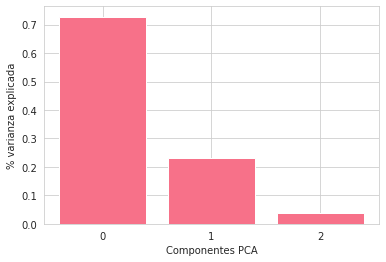

In [ ]:
plt.bar(range(pca.n_components_),pca.explained_variance_ratio_)
plt.xlabel('Componentes PCA')
plt.ylabel('% varianza explicada')
plt.xticks(range(pca.n_components_))

Text(0, 0.5, 'PCA 2')

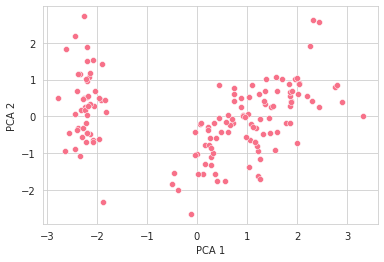

In [ ]:
pc1_values = components[:,0]
pc2_values = components[:,1]
sns.scatterplot(x=pc1_values, y=pc2_values)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

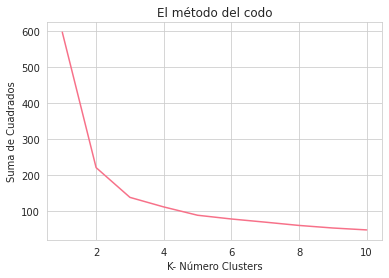

In [ ]:
squared_sum = []

for k in range(1,11):
  kmeans_test = KMeans(n_clusters= k) 
  kmeans_test.fit(components)
  squared_sum.append(kmeans_test.inertia_)

plt.plot(range(1,11),squared_sum)
plt.title('El método del codo')
plt.xlabel('K- Número Clusters')
plt.ylabel('Suma de Cuadrados')
plt.show()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 1 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1
 1 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 2 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


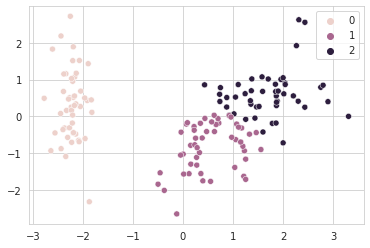

In [ ]:
kmeans_pca = KMeans(n_clusters=3)
kmeans_labels_pca = kmeans.fit_predict(components)
print(kmeans_labels_pca)


sns.scatterplot(x=pc1_values,
                y=pc2_values,
                hue=kmeans_labels_pca)

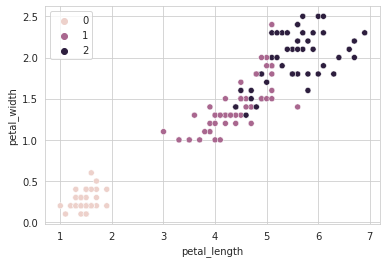

In [ ]:
sns.scatterplot(data=df_iris,
                x='petal_length',
                y='petal_width',
                hue=kmeans_labels_pca)